In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Ground_Truth - List.csv'
df = pd.read_csv(file_path)
df.head()

,QUESTIONS,ANSWER_BOT,CORRECT_ANSWER,CLASIFFICATION,TIME_SECONDS
0,ciu = 2555351,El proyecto con CIU 2555351 es 'MEJORAMIENTO D...,El proyecto con CIU 2555351 es 'MEJORAMIENTO D...,1,1
1,"nombre_proyecto_usuario = ""MEJORAMIENTO DE LA ...",El proyecto 'MEJORAMIENTO DE LA RUTA NACIONAL ...,El proyecto 'MEJORAMIENTO DE LA RUTA NACIONAL ...,1,1
2,Montos viables por Departamento,Departamento Monto viable Costo actualizado ...,Departamento Monto viable Costo actualizado ...,1,1
3,Montos viables por Provincia,Provincia Monto viable Costo actualizado...,Provincia Monto viable Costo actualizado...,1,1
4,Montos viables por Sector,Sector Monto viable \\n0 ...,Sector Monto viable \\n0 ...,1,1


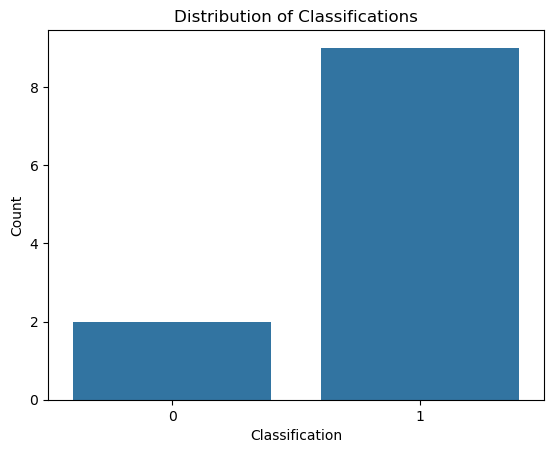

In [2]:
sns.countplot(x='CLASIFFICATION', data=df)
plt.title('Distribution of Classifications')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

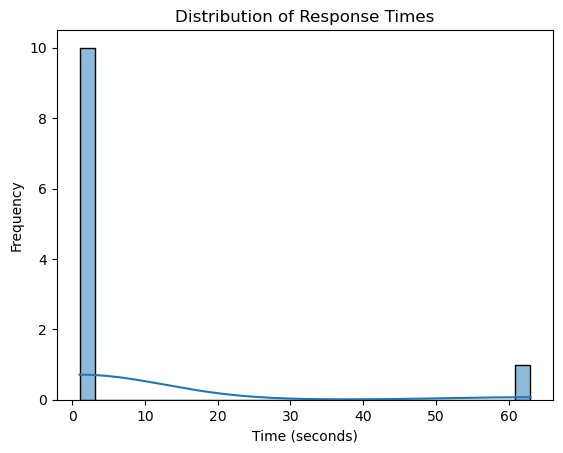

In [3]:
sns.histplot(df['TIME_SECONDS'], bins=30, kde=True)
plt.title('Distribution of Response Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

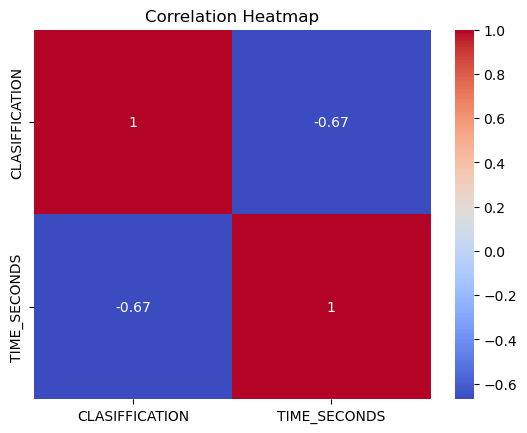

In [4]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data
X = numeric_df.drop('CLASIFFICATION', axis=1)
y = numeric_df['CLASIFFICATION']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.67
